<a href="https://colab.research.google.com/github/serrve1/githubtest/blob/main/%EA%B5%B0%EC%A7%91%ED%99%94%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EA%B2%BD%EA%B8%B0%EB%B6%84%EC%84%9D(project1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 한글폰트

경기분석을 군집화로 해보고 싶은데, 일단 k-means를 한번 생각해볼 수 있음 알고리즘을 제대로 이해하고 있는게 아니기 때문에 위험할 수 있으나 일단....해보자

# 1. 기본 패키지 설치

1. 기본패키지설치
2. 데이터 불러오기
2-1. 데이터프레임으로 저장
2-2. 자료구조살피기
info, columns
3. 데이터 전처리
drop => 일단 궁금하지 않은거제거
 3-1 EDA
  - 데이터프레임. describe().round(3)
  - sns(시본라이브러리).pairplot(df)
 3-2 데이터 표준화
  - standardscalar()함수 이용

In [128]:
# 기본패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 사이킷런
from sklearn.preprocessing import StandardScaler# 스케일링이 필요
from sklearn.cluster import KMeans # 케이민즈 알고리즘

### 2. 데이터불러오기

2000년 ~ 2023년 12월까지 가져오기
고용 : 실업률, 실업수당 청구건수
금리 : 미국 기준금리, 신용스프레드, 장단기 스프레드
물가 : PCE, 통화량(M2)
실물경제(제조업+주택) : 소매판매, 설비투자지수, 주택가격지수
# 분기로 묶을 거임 => 분기를 군집화 할 예정
# 거리기반 = 거리 조정이 필요, 시계열 자료의 정상성은 ?
=> 필요한지 일단 모르겠고 그대로  

#pmi제조업 지수는 시클리컬 하기 때문에 매우 중요
제조업 지수를 구할 수 없었고 신규주문으로 대체해보기

In [78]:
# 고용 관련 지표를 가져오기
# 실업률, 신규실업수당 청구건수 2가지
#!pip install full-fred

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import pandas as pd
BAMLH0A0HYM2 = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/BAMLH0A0HYM2(신용스프레드).csv')
FEDFUNDS = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/FEDFUNDS(기준금리)).csv')
ICSA =pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/ICSA(신규실업수당청구).csv')
M2= pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/M2.csv')
PCE = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/PCE.csv')
PNFI = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/PNFI(설비투자지수).csv')
RSXFS = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/RSXFS(소매판매).csv')
T10Y2Y = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/T10Y2Y(장단기금리차).csv')
UNRATE = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/UNRATE.csv')
USSTHPI = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/USSTHPI(주택가격지수).csv')
UMTMNO = pd.read_csv('/content/drive/MyDrive/프로젝트1/dataset/UMTMNO(제조업신규주문).csv')

 전체 지표들을 시각화할 것임 1. 추세를 제거하고 변동을 봐야할 것 같음 2. 그렇게 하려면 차분을 통해서 제거해야하나? 아님 다른 방법으로 제거해야하나? 3. 정상성이 중요하다면 ADF 검증이 필요한가? 4. Kmeans를 그냥 써보고 싶은데 정규화하면되나
 5. 2000~2022년까지 학습해보기 (코로나 포함)
 6. 분기별로 묶어서 구간 보기


In [132]:
# 2번돌리면 에러 사라짐
# object를 숫자로 처리하는 한가지 방법
BAMLH0A0HYM2.dropna(inplace = True)
BAMLH0A0HYM2.BAMLH0A0HYM2 = BAMLH0A0HYM2.BAMLH0A0HYM2.replace('.', pd.NaT)
BAMLH0A0HYM2.BAMLH0A0HYM2 = pd.to_numeric(BAMLH0A0HYM2.BAMLH0A0HYM2)
#BAMLH0A0HYM2.BAMLH0A0HYM2

# object => 정수로 변경
T10Y2Y.T10Y2Y = T10Y2Y.T10Y2Y.replace('.', pd.NaT)
T10Y2Y.T10Y2Y = pd.to_numeric(T10Y2Y.T10Y2Y,errors='coerce')

In [133]:
# 결측치는 전부 제거해주기
BAMLH0A0HYM2.dropna(inplace = True)
FEDFUNDS.dropna(inplace = True)
ICSA.dropna(inplace = True)
M2.dropna(inplace = True)
PCE.dropna(inplace = True)
PNFI.dropna(inplace = True)
RSXFS.dropna(inplace = True)
T10Y2Y.dropna(inplace = True)
UNRATE.dropna(inplace = True)
USSTHPI.dropna(inplace = True)
UMTMNO.dropna(inplace = True)

In [134]:
BAMLH0A0HYM2.info() #타입이 실수형이어야

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6277 entries, 0 to 6353
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          6277 non-null   object 
 1   BAMLH0A0HYM2  6277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 147.1+ KB


In [135]:
list = [BAMLH0A0HYM2, FEDFUNDS, ICSA, M2, PCE,PNFI,RSXFS,T10Y2Y,UNRATE,USSTHPI,UMTMNO ]
#BAMLH0A0HYM2['DATE'] = pd.to_datetime(BAMLH0A0HYM2['DATE'])
# 모든 Date를 datetime으로 바꿔줌
for i in list:
    i['DATE'] = pd.to_datetime(i['DATE'])

In [136]:
# # 'Year'와 'Month' 컬럼 추가
#BAMLH0A0HYM2_ = pd.DataFrame() # 분기별로 묶은 새로운 데이터 프레임 형성
# # 'Year'와 'Month'를 기준으로 그룹화하여 각 그룹에 대해 평균 계산, 예를들어 분기
BAMLH0A0HYM2['Year'] = BAMLH0A0HYM2['DATE'].dt.year
BAMLH0A0HYM2['Month'] = BAMLH0A0HYM2['DATE'].dt.month
BAMLH0A0HYM2= BAMLH0A0HYM2.groupby(['Year', 'Month']).mean().reset_index()
#BAMLH0A0HYM2 이 데이터가 가장 많이 존재하므로 이걸 기준으로 합칠 것
#list = [BAMLH0A0HYM2, FEDFUNDS, ICSA, M2, PCE,PNFI,RSXFS,T10Y2Y,UNRATE,USSTHPI,UMTMNO ]
BAMLH0A0HYM2['BAMLH0A0HYM2_분기평균'] = BAMLH0A0HYM2.iloc[:,2].rolling(window = 3).mean()

<ipython-input-136-4eeaff18abeb>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  BAMLH0A0HYM2= BAMLH0A0HYM2.groupby(['Year', 'Month']).mean().reset_index()


In [137]:
BAMLH0A0HYM2.loc[ 0,'BAMLH0A0HYM2_분기평균'] = BAMLH0A0HYM2.iloc[0]['BAMLH0A0HYM2'] # 2000년 1월은 채워넣어줘야함
BAMLH0A0HYM2.iloc[1,-1] =  4.902381
# 결측치가 있는 행만 뽑고 싶을 때
BAMLH0A0HYM2[BAMLH0A0HYM2.isna().any(axis=1)]

,Year,Month,BAMLH0A0HYM2,BAMLH0A0HYM2_분기평균


In [138]:
# 2번째 데이터처리, 월별로 존재
FEDFUNDS['Year'] = FEDFUNDS['DATE'].dt.year
FEDFUNDS['Month'] = FEDFUNDS['DATE'].dt.month
FEDFUNDS= FEDFUNDS.groupby(['Year', 'Month']).mean().reset_index()

FEDFUNDS['FEDFUNDS_분기평균'] = FEDFUNDS.iloc[:,2].rolling(window = 3).mean()
FEDFUNDS

<ipython-input-138-91bed8b27c8e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  FEDFUNDS= FEDFUNDS.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,FEDFUNDS,FEDFUNDS_분기평균
0,2000,1,5.45,NaN
1,2000,2,5.73,NaN
2,2000,3,5.85,5.676667
3,2000,4,6.02,5.866667
4,2000,5,6.27,6.046667
...,...,...,...,...
283,2023,8,5.33,5.176667
284,2023,9,5.33,5.260000
285,2023,10,5.33,5.330000
286,2023,11,5.33,5.330000


In [139]:
FEDFUNDS[FEDFUNDS.isna().any(axis=1)]
# 결측치 처리
FEDFUNDS.iloc[0,-1] =  5.45
FEDFUNDS.iloc[1,-1] =  5.73
FEDFUNDS[FEDFUNDS.isna().any(axis=1)]

,Year,Month,FEDFUNDS,FEDFUNDS_분기평균


In [140]:
# 3번째 데이터 처리 ICSA , 월별로 존재 대신 2023년부터 없음
ICSA['Year'] = ICSA['DATE'].dt.year
ICSA['Month'] = ICSA['DATE'].dt.month
ICSA= ICSA.groupby(['Year', 'Month']).mean().reset_index()
ICSA['ICSA_분기평균'] = ICSA.iloc[:,2].rolling(window = 3).mean()
ICSA

<ipython-input-140-af6e32158c72>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ICSA= ICSA.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,ICSA,ICSA_분기평균
0,2000,1,288400.0,NaN
1,2000,2,293750.0,NaN
2,2000,3,274750.0,285633.333333
3,2000,4,271600.0,280033.333333
4,2000,5,282250.0,276200.000000
...,...,...,...,...
272,2022,9,190500.0,205250.000000
273,2022,10,201400.0,200716.666667
274,2022,11,212500.0,201466.666667
275,2022,12,210600.0,208166.666667


In [141]:
ICSA[ICSA.isna().any(axis=1)]
ICSA.iloc[0,-1] =  288400.0
ICSA[ICSA.isna().any(axis=1)]

,Year,Month,ICSA,ICSA_분기평균
1,2000,2,293750.0,NaN


In [142]:
# 4번째 데이터 m2
M2['Year'] = M2['DATE'].dt.year
M2['Month'] = M2['DATE'].dt.month
M2= M2.groupby(['Year', 'Month']).mean().reset_index()
M2['M2_분기평균'] = M2.iloc[:,2].rolling(window = 3).mean()
M2

<ipython-input-142-2442c24508fd>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  M2= M2.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,M2SL,M2_분기평균
0,2000,1,4666.2,NaN
1,2000,2,4679.4,NaN
2,2000,3,4710.2,4685.266667
3,2000,4,4766.1,4718.566667
4,2000,5,4753.9,4743.400000
...,...,...,...,...
282,2023,7,20863.7,20846.300000
283,2023,8,20825.5,20847.900000
284,2023,9,20755.3,20814.833333
285,2023,10,20725.6,20768.800000


In [143]:
M2['M2_분기평균'].iloc[0] = 4666.2
M2[M2.isna().any(axis=1)]

<ipython-input-143-104ab3ba3b34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M2['M2_분기평균'].iloc[0] = 4666.2


,Year,Month,M2SL,M2_분기평균
1,2000,2,4679.4,NaN


In [144]:
# 5번째 데이터 PCE # 1,4,7,10 이런식으로 있다는게 문제
PCE['Year'] = PCE['DATE'].dt.year
PCE['Month'] = PCE['DATE'].dt.month
PCE= PCE.groupby(['Year', 'Month']).mean().reset_index()

PCE['PCE_분기평균'] = PCE.iloc[:,2].rolling(window = 3).mean()
PCE

<ipython-input-144-92b7a6240fcc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PCE= PCE.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,DPCCRV1Q225SBEA,PCE_분기평균
0,2000,1,2.1,NaN
1,2000,4,1.4,NaN
2,2000,7,1.9,1.800000
3,2000,10,2.0,1.766667
4,2001,1,2.6,2.166667
...,...,...,...,...
88,2022,1,6.0,5.333333
89,2022,4,4.7,5.300000
90,2022,7,5.0,5.233333
91,2022,10,4.7,4.800000


In [145]:
PCE[PCE.isna().any(axis=1)]
PCE.iloc[0,-1] =  2.1
PCE.iloc[1,-1] =  1.4
PCE[PCE.isna().any(axis=1)]

,Year,Month,DPCCRV1Q225SBEA,PCE_분기평균


In [146]:
# 6번째 데이터 PNFI
PNFI['Year'] = PNFI['DATE'].dt.year
PNFI['Month'] = PNFI['DATE'].dt.month
PNFI= PNFI.groupby(['Year', 'Month']).mean().reset_index()

PNFI['PNFI_분기평균'] = PNFI.PNFI # 나중에 전처리하고 다시 돌아오니 이거 만들 필요가 없었음

<ipython-input-146-d6f9cfbac557>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PNFI= PNFI.groupby(['Year', 'Month']).mean().reset_index()


In [147]:
PNFI[PNFI.isna().any(axis=1)]
PNFI.iloc[0,-1] =  1450.250
PNFI.iloc[1,-1] =  1498.729
PNFI[PNFI.isna().any(axis=1)]

,Year,Month,PNFI,PNFI_분기평균


In [148]:
# 7번째 데이터 RSXFS
RSXFS['Year'] = RSXFS['DATE'].dt.year
RSXFS['Month'] = RSXFS['DATE'].dt.month
RSXFS= RSXFS.groupby(['Year', 'Month']).mean().reset_index()

RSXFS['RSXFS_분기평균'] = RSXFS.iloc[:,2].rolling(window = 3).mean()
RSXFS

<ipython-input-148-bc1026228333>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RSXFS= RSXFS.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,RSXFS,RSXFS_분기평균
0,2000,1,243436.0,NaN
1,2000,2,247133.0,NaN
2,2000,3,249825.0,246798.000000
3,2000,4,245831.0,247596.333333
4,2000,5,246201.0,247285.666667
...,...,...,...,...
283,2023,8,608386.0,604304.666667
284,2023,9,612633.0,608270.333333
285,2023,10,610561.0,610526.666667
286,2023,11,611454.0,611549.333333


In [149]:
RSXFS[RSXFS.isna().any(axis=1)]
RSXFS.iloc[0,-1] =  243436.0
RSXFS.iloc[1,-1] =  247133.0
RSXFS[RSXFS.isna().any(axis=1)]

,Year,Month,RSXFS,RSXFS_분기평균


In [150]:
# 8번째 데이터 T10Y2Y
T10Y2Y['Year'] = T10Y2Y['DATE'].dt.year
T10Y2Y['Month'] = T10Y2Y['DATE'].dt.month
T10Y2Y= T10Y2Y.groupby(['Year', 'Month']).mean().reset_index()

T10Y2Y['T10Y2Y_분기평균'] = T10Y2Y.iloc[:,2].rolling(window = 3).mean()
T10Y2Y

<ipython-input-150-b716d2758411>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  T10Y2Y= T10Y2Y.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,T10Y2Y,T10Y2Y_분기평균
0,2000,1,0.221000,NaN
1,2000,2,-0.091000,NaN
2,2000,3,-0.271739,-0.047246
3,2000,4,-0.413158,-0.258632
4,2000,5,-0.369091,-0.351329
...,...,...,...,...
284,2023,9,-0.643000,-0.768638
285,2023,10,-0.269524,-0.548812
286,2023,11,-0.379524,-0.430683
287,2023,12,-0.437000,-0.362016


In [151]:
T10Y2Y[T10Y2Y.isna().any(axis=1)]
T10Y2Y.iloc[0,-1] =  0.221
T10Y2Y.iloc[1,-1] =  -0.091
T10Y2Y[T10Y2Y.isna().any(axis=1)]

,Year,Month,T10Y2Y,T10Y2Y_분기평균


In [152]:
# 9번째 데이터 UNRATE
UNRATE['Year'] = UNRATE['DATE'].dt.year
UNRATE['Month'] = UNRATE['DATE'].dt.month
UNRATE= UNRATE.groupby(['Year', 'Month']).mean().reset_index()

UNRATE['UNRATE_분기평균'] = UNRATE.iloc[:,2].rolling(window = 3).mean()
UNRATE

<ipython-input-152-24fc83c9bca4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  UNRATE= UNRATE.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,UNRATE,UNRATE_분기평균
0,2000,1,4.0,NaN
1,2000,2,4.1,NaN
2,2000,3,4.0,4.033333
3,2000,4,3.8,3.966667
4,2000,5,4.0,3.933333
...,...,...,...,...
283,2023,8,3.8,3.633333
284,2023,9,3.8,3.700000
285,2023,10,3.8,3.800000
286,2023,11,3.7,3.766667


In [153]:
UNRATE[UNRATE.isna().any(axis=1)]
UNRATE.UNRATE_분기평균.iloc[0] = 4.0

<ipython-input-153-b8c9883bbf57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UNRATE.UNRATE_분기평균.iloc[0] = 4.0


In [154]:
# 10번째 데이터 USSTHPI
USSTHPI['Year'] = USSTHPI['DATE'].dt.year
USSTHPI['Month'] = USSTHPI['DATE'].dt.month
USSTHPI= USSTHPI.groupby(['Year', 'Month']).mean().reset_index()

USSTHPI['USSTHPI_분기평균'] = USSTHPI.iloc[:,2].rolling(window = 3).mean()
USSTHPI

<ipython-input-154-eac73f65823e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  USSTHPI= USSTHPI.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,USSTHPI,USSTHPI_분기평균
0,2000,1,230.15,NaN
1,2000,4,233.89,NaN
2,2000,7,238.16,234.066667
3,2000,10,241.80,237.950000
4,2001,1,247.79,242.583333
...,...,...,...,...
90,2022,7,627.42,607.603333
91,2022,10,622.78,622.410000
92,2023,1,625.78,625.326667
93,2023,4,645.38,631.313333


In [155]:
USSTHPI[USSTHPI.isna().any(axis=1)]
USSTHPI.iloc[0,-1] =  230.15
USSTHPI.iloc[1,-1] =  233.89
USSTHPI[USSTHPI.isna().any(axis=1)]

,Year,Month,USSTHPI,USSTHPI_분기평균


In [156]:
# 11번째 데이터 UMTMNO
UMTMNO['Year'] = UMTMNO['DATE'].dt.year
UMTMNO['Month'] = UMTMNO['DATE'].dt.month
UMTMNO= UMTMNO.groupby(['Year', 'Month']).mean().reset_index()

UMTMNO['UMTMNO_분기평균'] = UMTMNO.iloc[:,2].rolling(window = 3).mean()
UMTMNO

<ipython-input-156-a664e78a3700>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  UMTMNO= UMTMNO.groupby(['Year', 'Month']).mean().reset_index()


,Year,Month,UMTMNO,UMTMNO_분기평균
0,2000,2,337504.0,NaN
1,2000,3,370003.0,NaN
2,2000,4,336901.0,348136.000000
3,2000,5,344615.0,350506.333333
4,2000,6,398101.0,359872.333333
...,...,...,...,...
281,2023,7,553738.0,589586.666667
282,2023,8,604203.0,594664.666667
283,2023,9,613485.0,590475.333333
284,2023,10,584976.0,600888.000000


In [157]:
UMTMNO[UMTMNO.isna().any(axis=1)]
UMTMNO.iloc[0,-1] =  337504.0
UMTMNO.iloc[1,-1] =  370003.0
UMTMNO[UMTMNO.isna().any(axis=1)]

,Year,Month,UMTMNO,UMTMNO_분기평균


In [158]:
# 리스트 재지정
list = [BAMLH0A0HYM2, FEDFUNDS, ICSA, M2, PCE,PNFI,RSXFS,T10Y2Y,UNRATE,USSTHPI,UMTMNO ]
df_ = BAMLH0A0HYM2[['Year','Month']] # 데이터 개수가 가장 많으니까
# 모든 데이터를 데이터프레임화
for i in list :
    df_ =  pd.merge(df_, i, on= ['Year', 'Month'], how='left')
    df_ = df_.loc[df_.Year != 2024]

In [159]:
# 결측치 확인과 처리 # 2000년 ~ 2021년까지 학습할 것 같음 2023년 데이터가 통으로 없는게 있어서
df_ = df_.loc[df_.Year <= 2021]

In [160]:
# 합치면서 사라진 결측치 처리하고 분기별로 뽑기
df_ = df_.loc[df_['Month'].isin([1, 4, 7, 10])]
df_

,Year,Month,BAMLH0A0HYM2,BAMLH0A0HYM2_분기평균,FEDFUNDS,FEDFUNDS_분기평균,ICSA,ICSA_분기평균,M2SL,M2_분기평균,...,RSXFS,RSXFS_분기평균,T10Y2Y,T10Y2Y_분기평균,UNRATE,UNRATE_분기평균,USSTHPI,USSTHPI_분기평균,UMTMNO,UMTMNO_분기평균
0,2000,1,4.784286,4.784286,5.45,5.450000,288400.0,288400.000000,4666.2,4666.200000,...,243436.0,243436.000000,0.221000,0.221000,4.0,4.000000,230.15,230.150000,NaN,NaN
3,2000,4,5.846500,5.372526,6.02,5.866667,271600.0,280033.333333,4766.1,4718.566667,...,245831.0,247596.333333,-0.413158,-0.258632,3.8,3.966667,233.89,233.890000,336901.0,348136.000000
6,2000,7,6.123333,6.052356,6.54,6.446667,295000.0,289416.666667,4789.4,4771.700000,...,247176.0,247179.000000,-0.285000,-0.346212,4.0,4.000000,238.16,234.066667,307154.0,349956.666667
9,2000,10,7.292273,6.702404,6.51,6.510000,301000.0,304650.000000,4869.2,4846.633333,...,251221.0,250211.333333,-0.173810,-0.286306,3.9,3.966667,241.80,237.950000,345596.0,354033.333333
12,2001,1,8.463182,8.521724,5.98,6.296667,340000.0,340083.333333,4975.7,4927.000000,...,252654.0,251214.333333,0.400952,0.043786,4.2,4.000000,247.79,242.583333,312664.0,331428.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2020,10,5.052174,5.145328,0.09,0.093333,795400.0,856516.666667,18729.1,18550.800000,...,490482.0,488724.333333,0.637619,0.564286,6.8,7.666667,472.44,463.003333,457632.0,451829.000000
252,2021,1,3.780476,4.116753,0.09,0.090000,827800.0,805266.666667,19357.0,19140.233333,...,510740.0,498329.000000,0.950000,0.817313,6.4,6.600000,483.83,472.843333,443949.0,450710.333333
255,2021,4,3.268095,3.447226,0.07,0.073333,589000.0,671083.333333,20116.7,19852.400000,...,552575.0,533560.666667,1.471818,1.359454,6.1,6.133333,510.74,489.003333,493290.0,492143.000000
258,2021,7,3.173043,3.227133,0.10,0.080000,363800.0,414500.000000,20663.0,20533.533333,...,537466.0,543720.666667,1.099048,1.293804,5.4,5.700000,539.20,511.256667,501584.0,514881.333333


In [161]:
df_.columns

Index(['Year', 'Month', 'BAMLH0A0HYM2', 'BAMLH0A0HYM2_분기평균', 'FEDFUNDS',
       'FEDFUNDS_분기평균', 'ICSA', 'ICSA_분기평균', 'M2SL', 'M2_분기평균',
       'DPCCRV1Q225SBEA', 'PCE_분기평균', 'PNFI', 'PNFI_분기평균', 'RSXFS',
       'RSXFS_분기평균', 'T10Y2Y', 'T10Y2Y_분기평균', 'UNRATE', 'UNRATE_분기평균',
       'USSTHPI', 'USSTHPI_분기평균', 'UMTMNO', 'UMTMNO_분기평균'],
      dtype='object')

In [162]:
df_ = df_[['Year','Month','BAMLH0A0HYM2_분기평균', 'FEDFUNDS_분기평균', 'ICSA_분기평균', 'M2_분기평균', 'PCE_분기평균', 'PNFI_분기평균', 'RSXFS_분기평균','T10Y2Y_분기평균', 'UNRATE_분기평균','USSTHPI_분기평균','UMTMNO_분기평균']]

In [163]:
#df_.fillna(metode = 'bfill')
df_.M2_분기평균 = df_.M2_분기평균.fillna(method = 'bfill')
df_.UNRATE_분기평균 = df_.UNRATE_분기평균.fillna(method = 'bfill')
df_.UMTMNO_분기평균 = df_.UMTMNO_분기평균.fillna(method = 'bfill')
df_

<ipython-input-163-2130ad7c0658>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.M2_분기평균 = df_.M2_분기평균.fillna(method = 'bfill')
<ipython-input-163-2130ad7c0658>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.UNRATE_분기평균 = df_.UNRATE_분기평균.fillna(method = 'bfill')
<ipython-input-163-2130ad7c0658>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Year,Month,BAMLH0A0HYM2_분기평균,FEDFUNDS_분기평균,ICSA_분기평균,M2_분기평균,PCE_분기평균,PNFI_분기평균,RSXFS_분기평균,T10Y2Y_분기평균,UNRATE_분기평균,USSTHPI_분기평균,UMTMNO_분기평균
0,2000,1,4.784286,5.450000,288400.000000,4666.200000,2.100000,1450.250,243436.000000,0.221000,4.000000,230.150000,348136.000000
3,2000,4,5.372526,5.866667,280033.333333,4718.566667,1.400000,1498.729,247596.333333,-0.258632,3.966667,233.890000,348136.000000
6,2000,7,6.052356,6.446667,289416.666667,4771.700000,1.800000,1519.657,247179.000000,-0.346212,4.000000,234.066667,349956.666667
9,2000,10,6.702404,6.510000,304650.000000,4846.633333,1.766667,1525.091,250211.333333,-0.286306,3.966667,237.950000,354033.333333
12,2001,1,8.521724,6.296667,340083.333333,4927.000000,2.166667,1505.248,251214.333333,0.043786,4.000000,242.583333,331428.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2020,10,5.145328,0.093333,856516.666667,18550.800000,1.366667,2930.676,488724.333333,0.564286,7.666667,463.003333,451829.000000
252,2021,1,4.116753,0.090000,805266.666667,19140.233333,2.833333,2993.367,498329.000000,0.817313,6.600000,472.843333,450710.333333
255,2021,4,3.447226,0.073333,671083.333333,19852.400000,3.800000,3065.155,533560.666667,1.359454,6.133333,489.003333,492143.000000
258,2021,7,3.227133,0.080000,414500.000000,20533.533333,4.800000,3088.878,543720.666667,1.293804,5.700000,511.256667,514881.333333


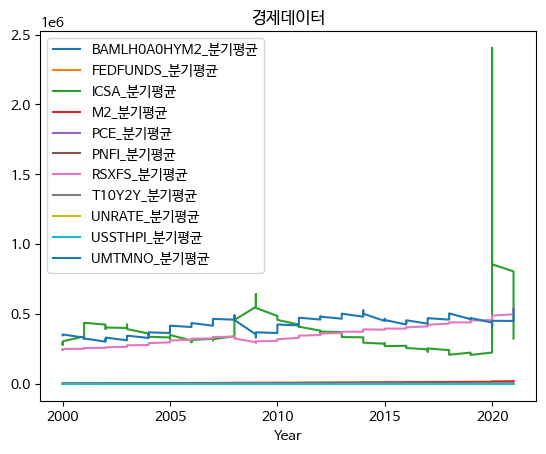

<Figure size 2000x1000 with 0 Axes>

In [164]:

# 한글 폰트 사용을 위해서 세팅
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
ax = df_.plot(x='Year', y= ['BAMLH0A0HYM2_분기평균',
       'FEDFUNDS_분기평균', 'ICSA_분기평균', 'M2_분기평균',
        'PCE_분기평균', 'PNFI_분기평균',
       'RSXFS_분기평균','T10Y2Y_분기평균', 'UNRATE_분기평균',
       'USSTHPI_분기평균','UMTMNO_분기평균'], kind='line')

# 그래프 출력
ax.set_yscale('linear')  # 00.set_yscale() 함수log를 입력한다면 로그 스케일로 변경
plt.title('경제데이터')
plt.figure(figsize =(20,10))
plt.show()

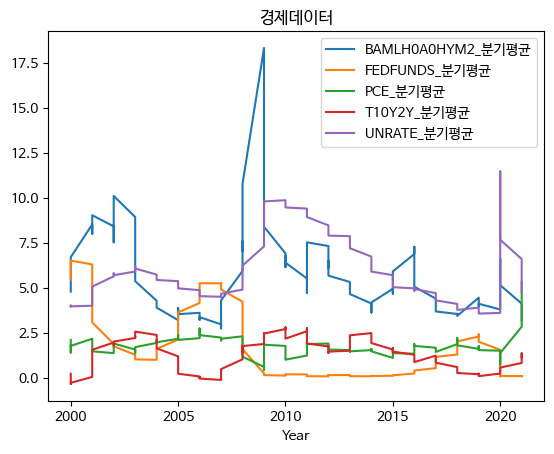

<Figure size 2000x200 with 0 Axes>

In [165]:
# 스케일이 작은 것끼리 모아놓음
# 한글 폰트 사용을 위해서 세팅
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
ax = df_.plot(x='Year', y= ['BAMLH0A0HYM2_분기평균',
       'FEDFUNDS_분기평균',
        'PCE_분기평균',
       'T10Y2Y_분기평균', 'UNRATE_분기평균',
       ], kind='line')

# 그래프 출력
ax.set_yscale('linear')  # 00.set_yscale() 함수에 log를 입력한다면 로그 스케일로 변경
plt.title('경제데이터')
plt.figure(figsize =(20,2))
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


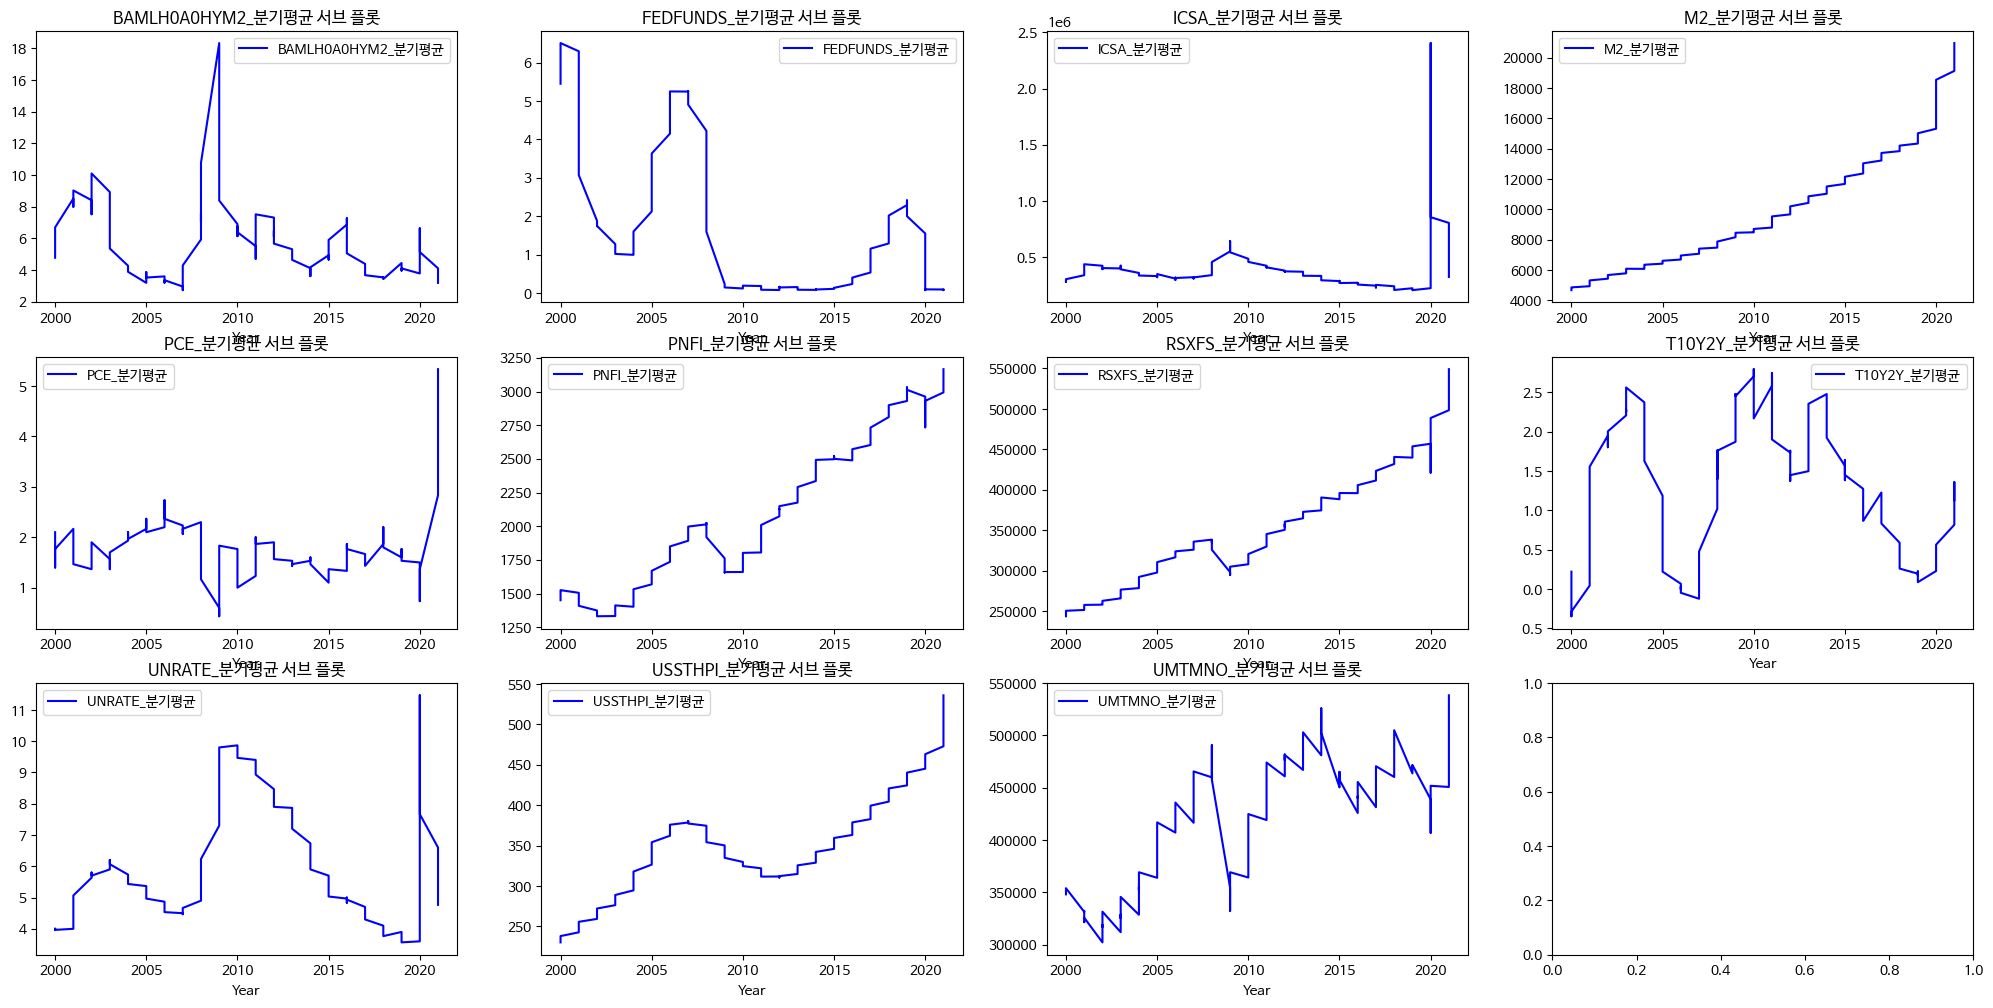

In [166]:
import numpy as np

# 그래프 크기 조정
가로, 세로 = 25, 12  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성

# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(['BAMLH0A0HYM2_분기평균',
       'FEDFUNDS_분기평균', 'ICSA_분기평균', 'M2_분기평균', 'PCE_분기평균', 'PNFI_분기평균',
       'RSXFS_분기평균','T10Y2Y_분기평균', 'UNRATE_분기평균',
       'USSTHPI_분기평균','UMTMNO_분기평균']):
    df_.plot(x='Year', y=col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

<ipython-input-167-1b468d9a00c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['M2_분기평균'] = df_['M2_분기평균'].diff().fillna(method = 'bfill')
<ipython-input-167-1b468d9a00c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['PNFI_분기평균'] = df_['PNFI_분기평균'].diff().fillna(method = 'bfill')
<ipython-input-167-1b468d9a00c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

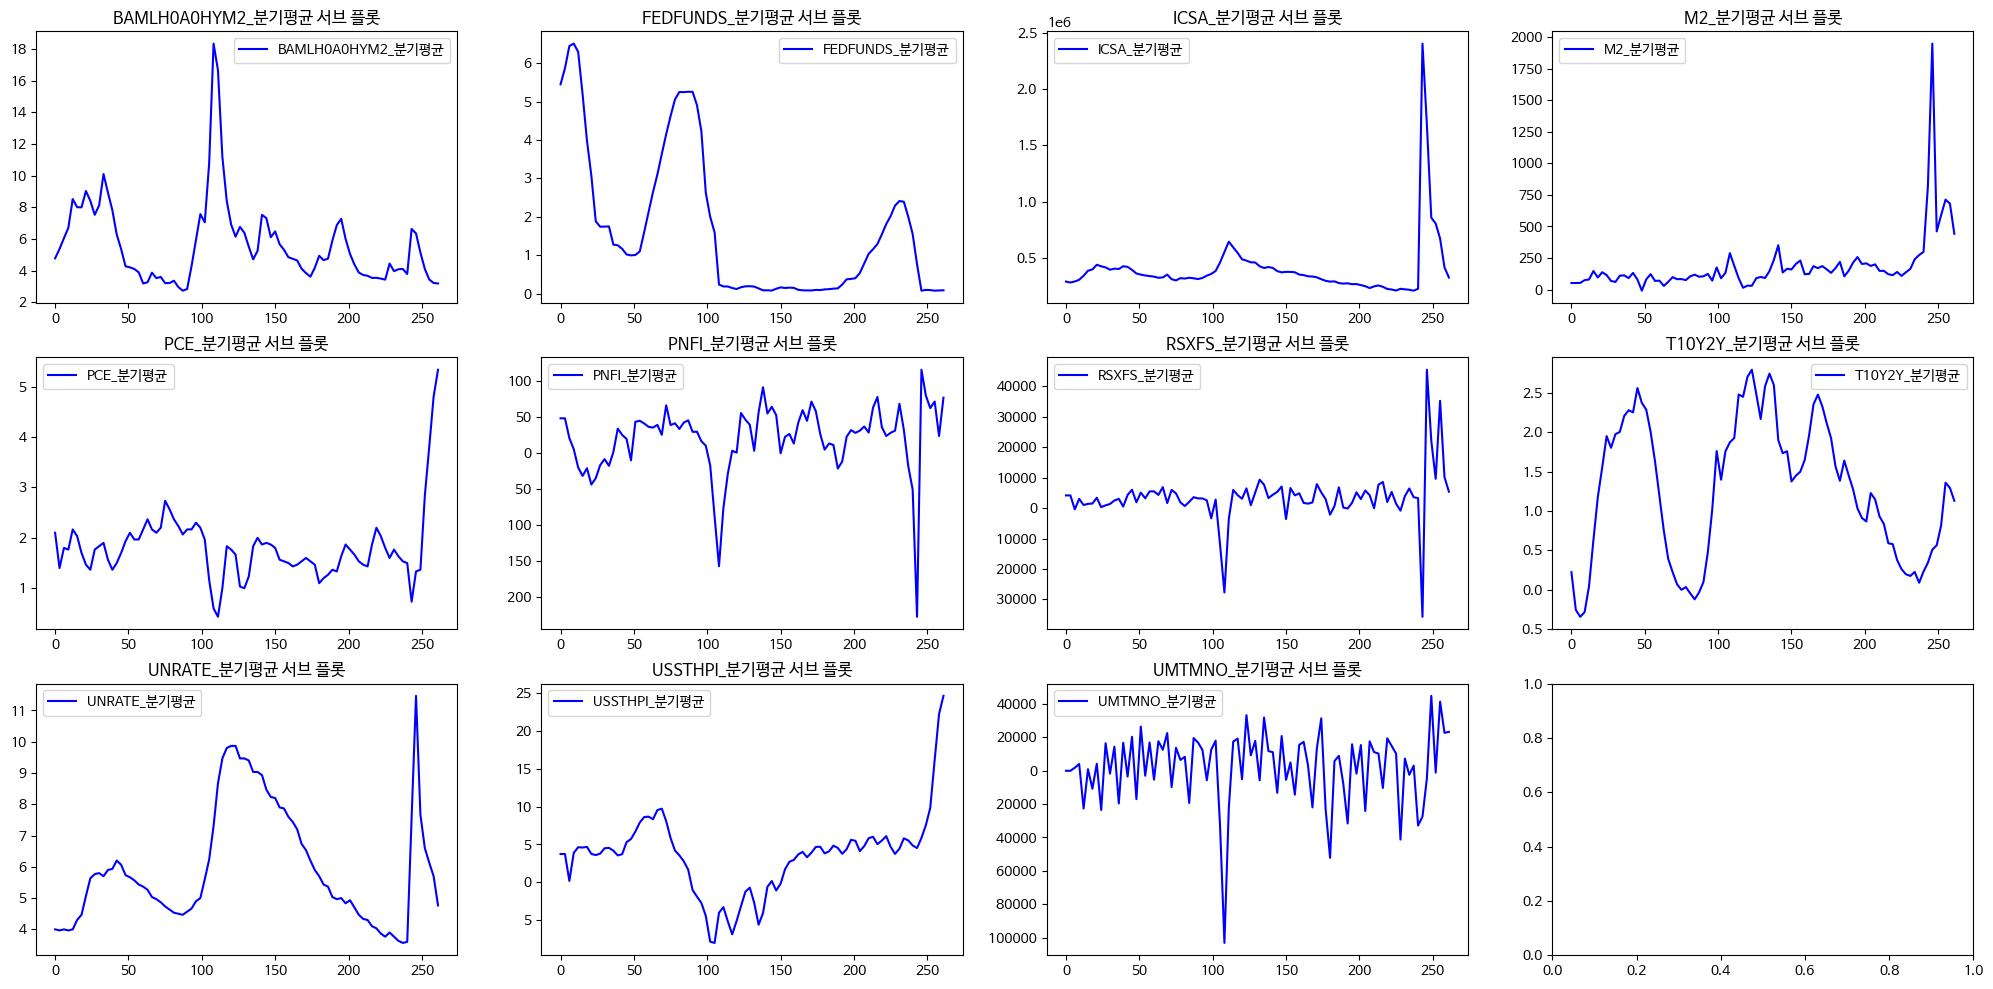

In [167]:
#M2, PNFL, RSXFS, USSTHPI,UMTMNO 추세를 조정 (1차 차분)

df_['M2_분기평균'] = df_['M2_분기평균'].diff().fillna(method = 'bfill')
df_['PNFI_분기평균'] = df_['PNFI_분기평균'].diff().fillna(method = 'bfill')
df_['RSXFS_분기평균'] = df_['RSXFS_분기평균'].diff().fillna(method = 'bfill')
df_['USSTHPI_분기평균'] = df_['USSTHPI_분기평균'].diff().fillna(method = 'bfill')
df_['UMTMNO_분기평균'] = df_['UMTMNO_분기평균'].diff().fillna(method = 'bfill')

# # 차분 후 그래프 다시 확인
# # 그래프 크기 조정
# 가로, 세로 = 25, 12  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성

# # 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(['BAMLH0A0HYM2_분기평균',
        'FEDFUNDS_분기평균', 'ICSA_분기평균', 'M2_분기평균', 'PCE_분기평균', 'PNFI_분기평균',
        'RSXFS_분기평균','T10Y2Y_분기평균', 'UNRATE_분기평균',
        'USSTHPI_분기평균','UMTMNO_분기평균']):
     df_.plot(y=col, kind='line', ax=axs[i//4, i%4], color='blue')
     axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# # 그래프 출력
plt.show()



https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical

* 이제 군집화

In [168]:
# 3개의 데이터는 거의다 결측치가 있는데  합치는과정에서인지 아니면 처음부터 없었는지 파악

In [169]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

df_['Year'] = df_['Year'].astype(str)
df_['Month'] = df_['Month'].astype(str)
df_['DATE'] = df_['Year'] +'-'+ df_['Month']
df_ = df_.drop(columns = ['Year', 'Month']) # 연,월 컬럼 제거
df_['DATE'] = pd.to_datetime(df_['DATE'])
df_.set_index('DATE',inplace = True) # 데이트를 인덱스로
# 데이트를 datetime으로 변경해라

<ipython-input-169-48b1e89d7ded>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Year'] = df_['Year'].astype(str)
<ipython-input-169-48b1e89d7ded>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Month'] = df_['Month'].astype(str)
<ipython-input-169-48b1e89d7ded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [170]:
df_ # date의 일(day)는 제거해야함

,BAMLH0A0HYM2_분기평균,FEDFUNDS_분기평균,ICSA_분기평균,M2_분기평균,PCE_분기평균,PNFI_분기평균,RSXFS_분기평균,T10Y2Y_분기평균,UNRATE_분기평균,USSTHPI_분기평균,UMTMNO_분기평균
DATE,,,,,,,,,,,
2000-01-01,4.784286,5.450000,288400.000000,52.366667,2.100000,48.479,4160.333333,0.221000,4.000000,3.740000,0.000000
2000-04-01,5.372526,5.866667,280033.333333,52.366667,1.400000,48.479,4160.333333,-0.258632,3.966667,3.740000,0.000000
2000-07-01,6.052356,6.446667,289416.666667,53.133333,1.800000,20.928,-417.333333,-0.346212,4.000000,0.176667,1820.666667
2000-10-01,6.702404,6.510000,304650.000000,74.933333,1.766667,5.434,3032.333333,-0.286306,3.966667,3.883333,4076.666667
2001-01-01,8.521724,6.296667,340083.333333,80.366667,2.166667,-19.843,1003.000000,0.043786,4.000000,4.633333,-22605.333333
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,5.145328,0.093333,856516.666667,461.100000,1.366667,80.212,22115.000000,0.564286,7.666667,7.543333,44924.000000
2021-01-01,4.116753,0.090000,805266.666667,589.433333,2.833333,62.691,9604.666667,0.817313,6.600000,9.840000,-1118.666667
2021-04-01,3.447226,0.073333,671083.333333,712.166667,3.800000,71.788,35231.666667,1.359454,6.133333,16.160000,41432.666667


https://hweejin.tistory.com/entry/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-%EB%B6%84%EC%84%9D-3-%EC%8A%A4%EC%BC%80%EC%9D%BC-%EC%A1%B0%EC%A0%95
스케일러설명

In [171]:
# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_)
scaled_df = scaler.transform(df_)
scaled_df = pd.DataFrame(index=df_.index ,data= scaled_df, columns=df_.columns)
scaled_df

,BAMLH0A0HYM2_분기평균,FEDFUNDS_분기평균,ICSA_분기평균,M2_분기평균,PCE_분기평균,PNFI_분기평균,RSXFS_분기평균,T10Y2Y_분기평균,UNRATE_분기평균,USSTHPI_분기평균,UMTMNO_분기평균
DATE,,,,,,,,,,,
2000-01-01,0.131140,0.835318,0.036848,0.031085,0.340136,0.803497,0.491359,0.180489,0.054852,0.359992,0.696752
2000-04-01,0.168860,0.900052,0.033041,0.031085,0.197279,0.803497,0.491359,0.027868,0.050633,0.359992,0.696752
2000-07-01,0.212453,0.990161,0.037311,0.031477,0.278912,0.723372,0.434948,0.000000,0.054852,0.250944,0.709042
2000-10-01,0.254137,1.000000,0.044244,0.042622,0.272109,0.678312,0.477459,0.019062,0.050633,0.364378,0.724270
2001-01-01,0.370798,0.966857,0.060370,0.045400,0.353741,0.604801,0.452451,0.124099,0.054852,0.387330,0.544160
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,0.154291,0.003107,0.295400,0.240056,0.190476,0.895784,0.712619,0.289724,0.518987,0.476385,1.000000
2021-01-01,0.088336,0.002589,0.272076,0.305668,0.489796,0.844829,0.558451,0.370239,0.383966,0.546669,0.689201
2021-04-01,0.045403,0.000000,0.211009,0.368417,0.687075,0.871285,0.874258,0.542750,0.324895,0.740080,0.976433


In [172]:


# 차원축소  - 적절한 차원은 얼마인가?
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_df)
scaled_df['pca_x'] = pca_transformed[:, 0]
scaled_df['pca_y'] = pca_transformed[:, 1]
scaled_df.head()


kmeans = KMeans(n_clusters =4, init = 'k-means++', max_iter= 300, random_state= 0) # 군집을 4개로
kmeans.fit(scaled_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


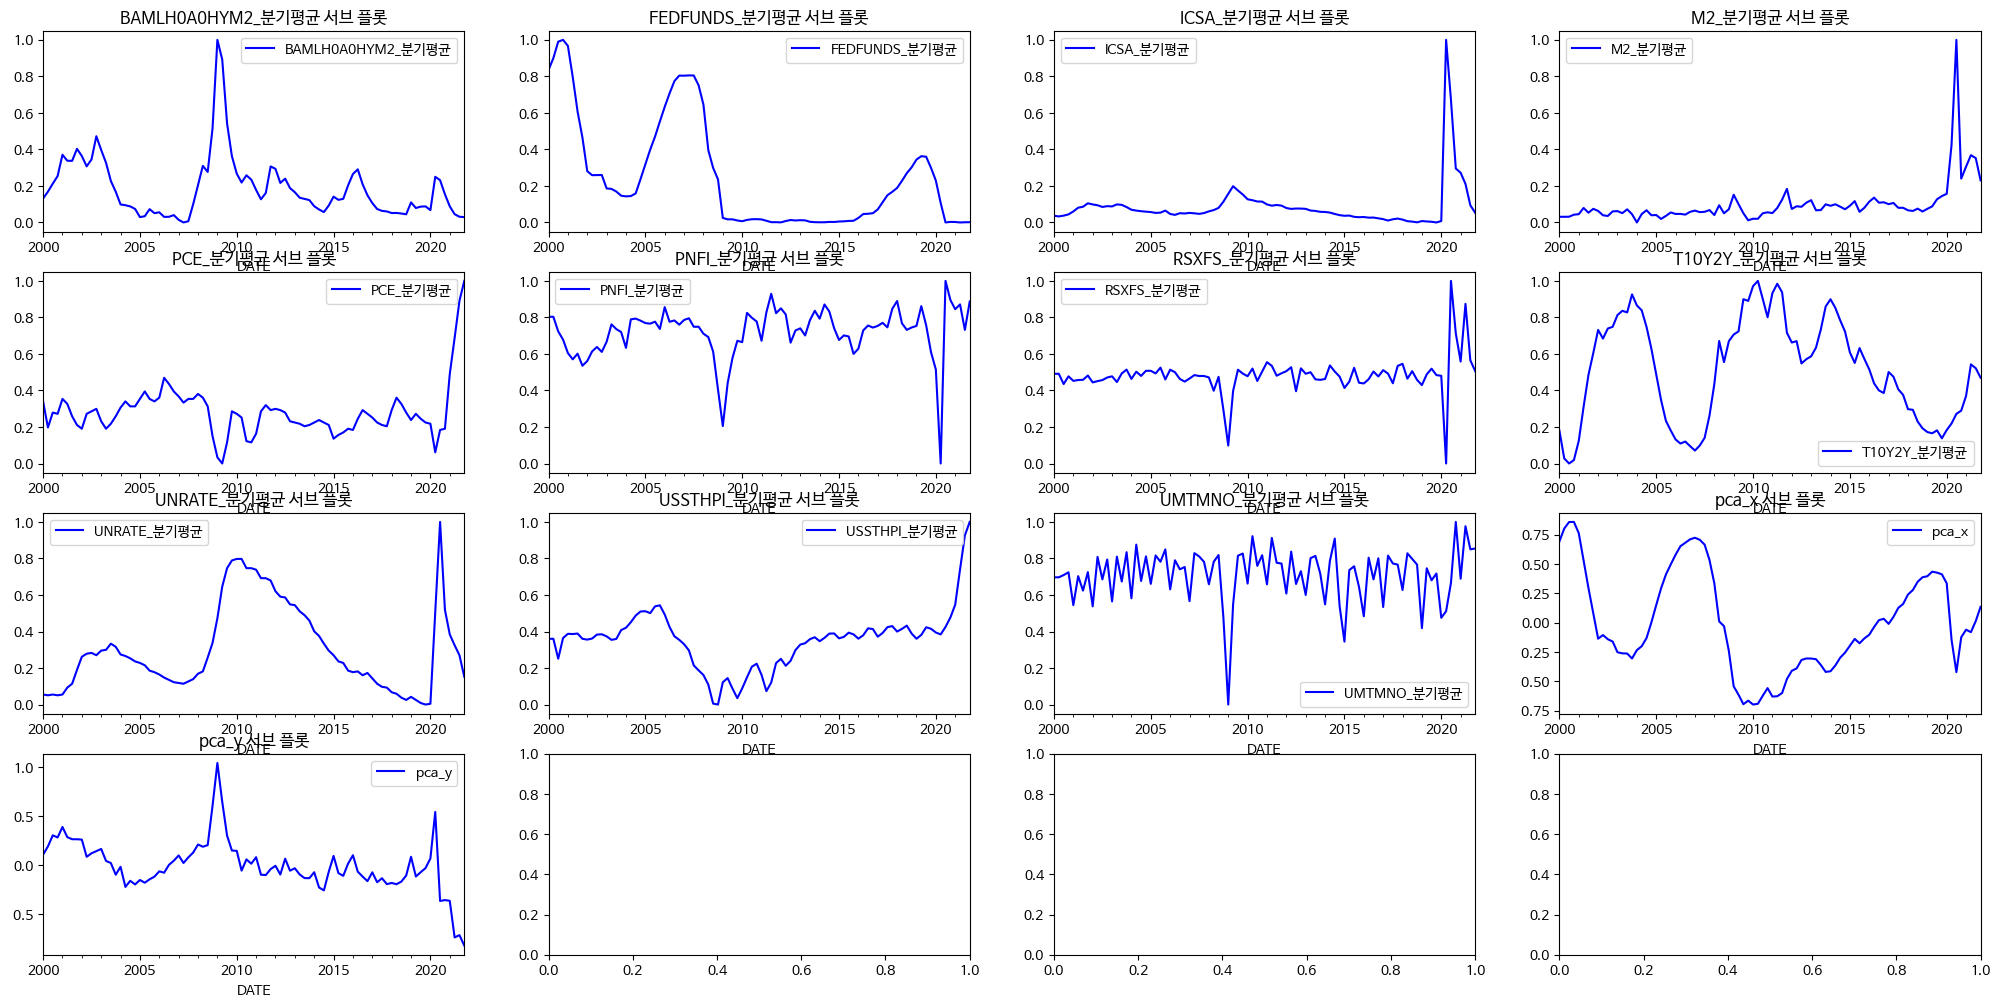

In [173]:
# 그래프 크기 조정
가로, 세로 = 25, 12  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(가로, 세로))  # 4행 5열의 서브 플롯 생성

# 각 컬럼에 대한 서브 플롯 그리기

for i, col in enumerate(scaled_df.columns):
    scaled_df.plot( y=col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()




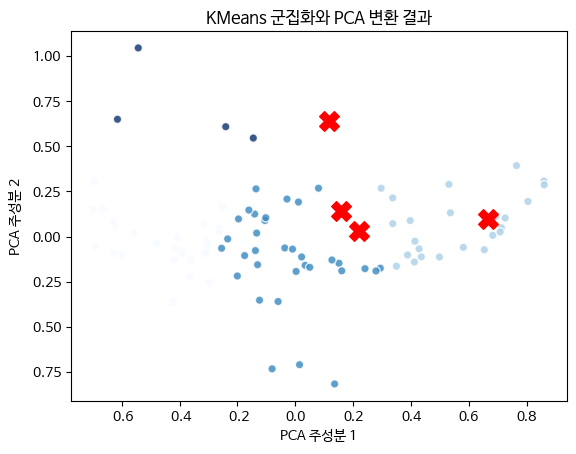

In [174]:
# KMeans 군집화와 PCA 변환 결과를 산점도로 표현합니다.
plt.scatter(scaled_df['pca_x'], scaled_df['pca_y'], c=kmeans.labels_, cmap='Blues', marker='o', alpha=0.8, edgecolors='w')

# 각 클러스터의 중심점을 빨간색 'X'로 표시합니다.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='중심점')

plt.title('KMeans 군집화와 PCA 변환 결과')
plt.xlabel('PCA 주성분 1')
plt.ylabel('PCA 주성분 2')
# plt.legend()
plt.show()

# 스케일링 안하면 이렇게 큰 값의 영향을 많이 받음

In [175]:
# 1. 연도조정 , 2. PCA 컴포넌트 크기 ,PCA 여부 3. K-MEANS K개수, 그리고 K-MEANS 하는게 맞는지
# 기초통계량
scaled_df.describe()

,BAMLH0A0HYM2_분기평균,FEDFUNDS_분기평균,ICSA_분기평균,M2_분기평균,PCE_분기평균,PNFI_분기평균,RSXFS_분기평균,T10Y2Y_분기평균,UNRATE_분기평균,USSTHPI_분기평균,UMTMNO_분기평균,pca_x,pca_y
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,8.800000e+01,8.800000e+01
mean,0.188365,0.250135,0.087209,0.099372,0.281617,0.720814,0.483480,0.512960,0.302647,0.353169,0.711333,-2.775558e-17,-1.513940e-17
std,0.169888,0.297143,0.128998,0.121828,0.141833,0.141284,0.106792,0.282932,0.236042,0.161477,0.146389,4.283878e-01,2.642287e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.979412e-01,-8.173954e-01
25%,0.072390,0.010487,0.037195,0.050381,0.210884,0.670714,0.457986,0.254947,0.125527,0.285142,0.654999,-3.052030e-01,-1.288128e-01
50%,0.138445,0.147851,0.060574,0.069890,0.272109,0.747262,0.480568,0.545342,0.244726,0.371060,0.738349,-9.134679e-02,-3.249073e-02
75%,0.259977,0.360694,0.092661,0.100327,0.328231,0.793959,0.506856,0.735626,0.463080,0.414516,0.810184,3.397200e-01,1.139687e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.596764e-01,1.046029e+00
